### Imports

In [1]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, make_scorer,mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, precision_score, recall_score, f1_score,r2_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import warnings
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
warnings.filterwarnings('ignore')


### Make Dataframe

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Data Preprocessing

In [3]:
# One-hot encode the categorical variables
categorical_columns = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])

In [ ]:
df.head()

### Scaling

In [4]:
# Normalize the numerical features
scaler = StandardScaler()
numerical_columns = ['total_bill', 'size']
scaled_numerical = scaler.fit_transform(df[numerical_columns])

### Split

In [5]:
# Combine the preprocessed features
X = np.hstack((scaled_numerical, encoded_categorical))
y = df['tip'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

### RandomSearchCV

In [9]:
# Define an expanded parameter range for SVR
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform Random Search with increased cross-validation folds
random_search = RandomizedSearchCV(estimator=SVR(), param_distributions=param_dist, n_iter=150, cv=10, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and evaluate
best_params = random_search.best_params_
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, mse, r2


({'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1},
 0.711287724214384,
 0.4309567760058153)

### GridSearch CV

In [10]:
# Define the parameter grid for SVR
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVR model
svr = SVR()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_dist, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, best_score, mse, r2


({'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'},
 0.34491182115773,
 0.8827105555655659,
 0.2938153671251428)

### Visualizing results

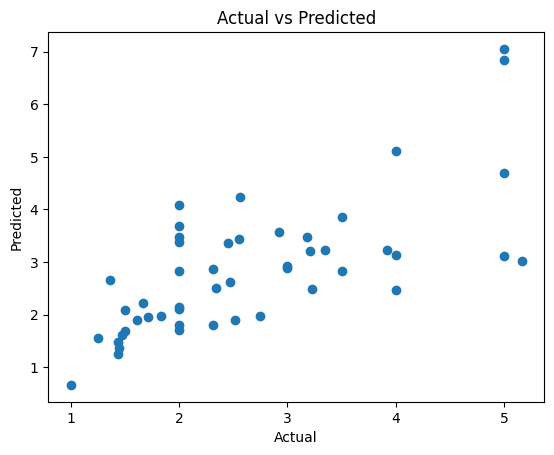

In [11]:
#plot the comparison
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()